In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('penguins.csv').dropna()

In [3]:
# Transforma coluna sex em dummy
df['sex'] = df['sex'].replace('.', np.nan).replace({'MALE': 0, 'FEMALE': 1}).dropna()
df.dropna(inplace=True)

C:\Users\felip\AppData\Local\Temp\ipykernel_5812\413587169.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace('.', np.nan).replace({'MALE': 0, 'FEMALE': 1}).dropna()


In [4]:
# Define as variáveis
x = df

# Faz scaling nos dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

Text(0.5, 1.0, 'Elbow Method')

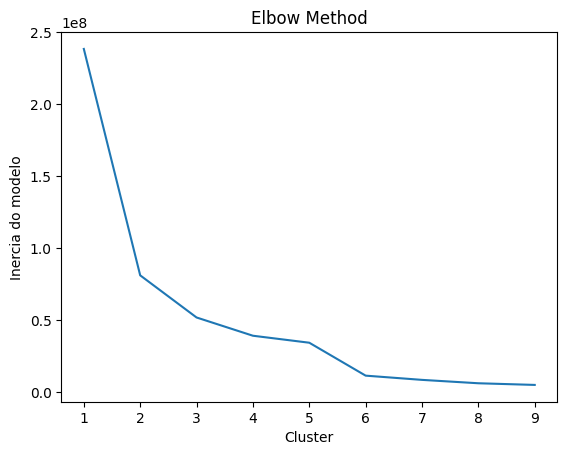

In [5]:
# Cria gráfico de cotovelo
from sklearn.cluster import KMeans
k_range = range(1,10)
inertias = []
for k in k_range:
    kn = KMeans(n_clusters=k, random_state=0)
    kn.fit(x)
    inertias.append(kn.inertia_)

plt.plot(k_range, inertias)
plt.ylabel('Inercia do modelo')
plt.xlabel('Cluster')
plt.title('Elbow Method')

In [6]:
# Iremos usar 2 clusters para o modelo
kmeans_model = KMeans(n_clusters=2, random_state=42)
model_predict = kmeans_model.fit_predict(x)

df['cluster'] = model_predict
print(f'Inercia do modelo: {kmeans_model.inertia_}')

Inercia do modelo: 80670954.42271417


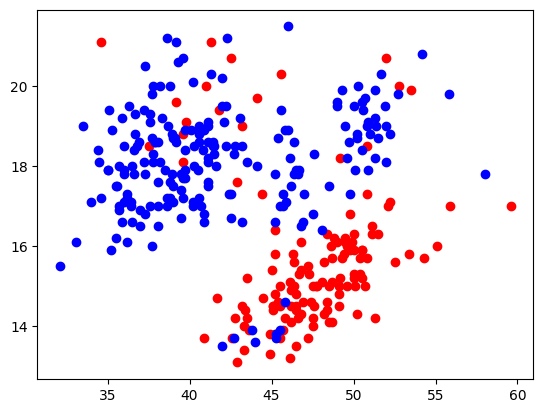

In [7]:
# Plota gráfico

df0 = df[df['cluster'] == 0] # dados apenas classificados como 0
df1 = df[df['cluster'] == 1] # dados apenas classificados como 1


plt.scatter(df1.iloc[:,0], df1.iloc[:,1], color='red') # plota o agrupamento de dados 1
plt.scatter(df0.iloc[:,0], df0.iloc[:,1], color='blue') # plota o agrupamento de dados 0